# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

18:25:39 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=283972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=212446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=315035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=198550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=655923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=243273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

18:25:41 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=365525;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=327577;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=486029;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=902355;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

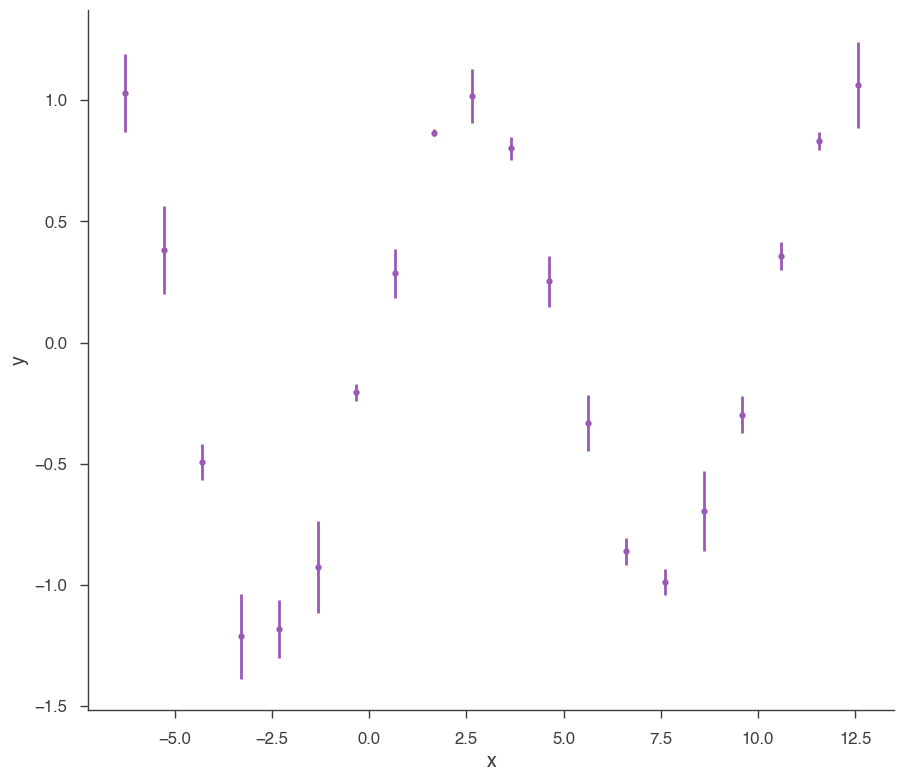

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=464091;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=425953;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

18:25:44 INFO      Mean acceptance fraction: 0.7199                                            ]8;id=710682;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=816528;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

18:25:45 INFO      fit restored to maximum of posterior                                         ]8;id=916048;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=89972;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=901122;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=680634;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.015 -0.014 +0.016,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.541238
total,-7.541238


Values of statistical measures:

,statistical measures
AIC,19.788359
BIC,21.073941
DIC,19.199965
PDIC,2.057989


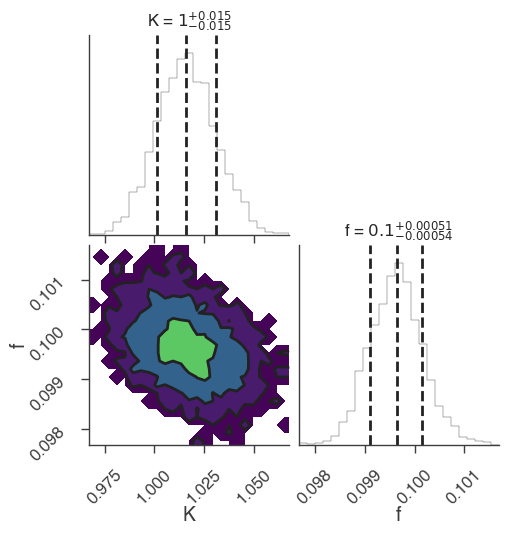

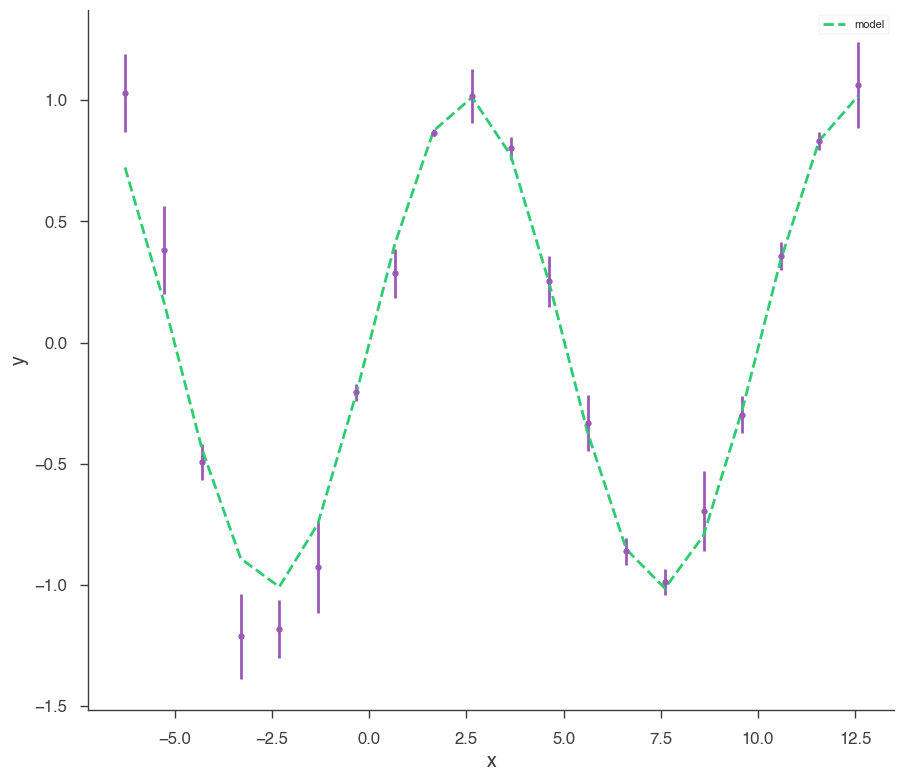

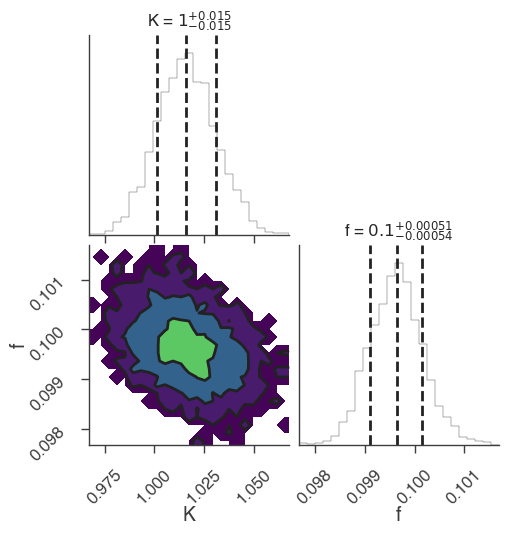

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

         INFO      sampler set to multinest                                                ]8;id=959213;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=989860;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -17.055011698864593      +/-  0.14576679544295126     
 Total Likelihood Evaluations:         5308
 Sampling finished. Exiting MultiNest



18:25:46 INFO      fit restored to maximum of posterior                                         ]8;id=650731;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=365187;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=133892;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=969058;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.016 -0.016 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.05 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.541119
total,-7.541119


Values of statistical measures:

,statistical measures
AIC,19.788120
BIC,21.073702
DIC,19.254705
PDIC,2.085325
log(Z),-7.406897


         INFO      deleting the chain directory chains                                     ]8;id=548066;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=938977;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

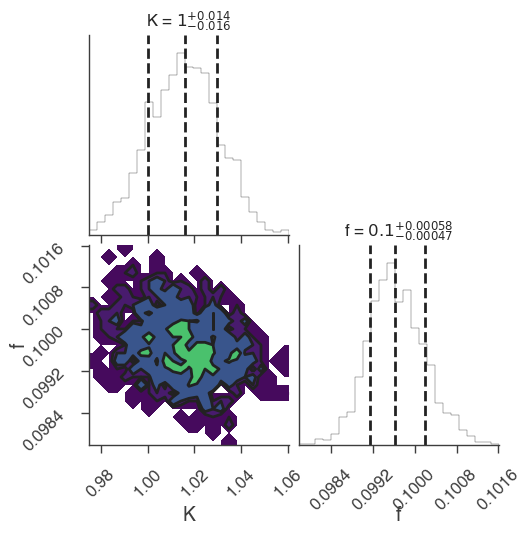

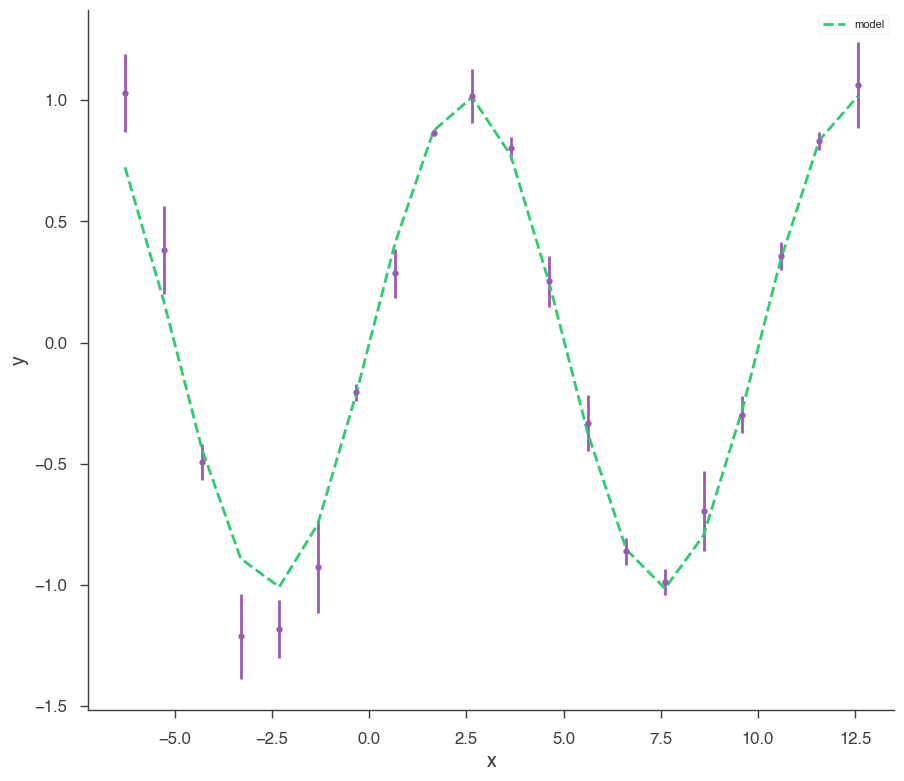

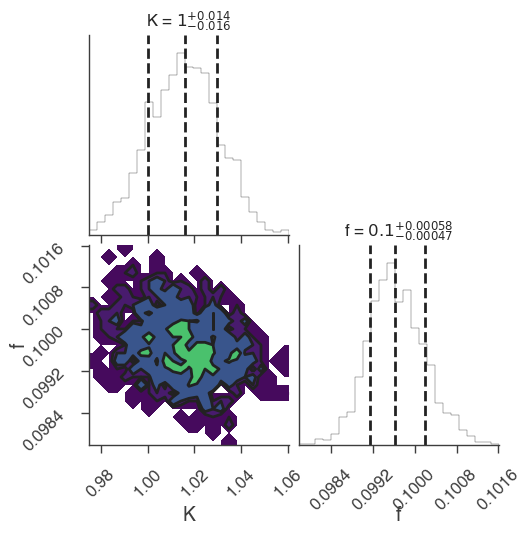

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

18:25:47 INFO      sampler set to dynesty_nested                                           ]8;id=848122;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=989230;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

248it [00:00, 2477.52it/s, bound: 0 | nc: 2 | ncall: 727 | eff(%): 34.113 | loglstar:   -inf < -2888.638 <    inf | logz: -2895.942 +/-  0.135 | dlogz: 2912.926 >  0.409]

496it [00:00, 1712.77it/s, bound: 0 | nc: 12 | ncall: 1340 | eff(%): 37.015 | loglstar:   -inf < -2114.594 <    inf | logz: -2121.656 +/-  0.131 | dlogz: 2113.189 >  0.409]

681it [00:00, 1494.37it/s, bound: 0 | nc: 3 | ncall: 2122 | eff(%): 32.092 | loglstar:   -inf < -1785.755 <    inf | logz: -1793.720 +/-  0.135 | dlogz: 1785.111 >  0.409] 

839it [00:00, 1238.56it/s, bound: 0 | nc: 1 | ncall: 3167 | eff(%): 26.492 | loglstar:   -inf < -1307.672 <    inf | logz: -1316.445 +/-  0.148 | dlogz: 1311.600 >  0.409]

970it [00:00, 877.87it/s, bound: 0 | nc: 2 | ncall: 4711 | eff(%): 20.590 | loglstar:   -inf < -806.440 <    inf | logz: -815.022 +/-  0.139 | dlogz: 805.392 >  0.409]    

1072it [00:01, 760.11it/s, bound: 0 | nc: 52 | ncall: 6395 | eff(%): 16.763 | loglstar:   -inf < -594.720 <    inf | logz: -604.034 +/-  0.151 | dlogz: 596.466 >  0.409]

1158it [00:01, 642.84it/s, bound: 0 | nc: 19 | ncall: 7973 | eff(%): 14.524 | loglstar:   -inf < -484.434 <    inf | logz: -493.231 +/-  0.142 | dlogz: 482.923 >  0.409]

1229it [00:01, 536.71it/s, bound: 0 | nc: 20 | ncall: 9516 | eff(%): 12.915 | loglstar:   -inf < -403.189 <    inf | logz: -411.390 +/-  0.138 | dlogz: 400.313 >  0.409]

1288it [00:01, 330.89it/s, bound: 0 | nc: 9 | ncall: 11373 | eff(%): 11.325 | loglstar:   -inf < -344.816 <    inf | logz: -353.552 +/-  0.144 | dlogz: 342.783 >  0.409]

1333it [00:02, 296.95it/s, bound: 0 | nc: 10 | ncall: 12841 | eff(%): 10.381 | loglstar:   -inf < -310.465 <    inf | logz: -319.094 +/-  0.142 | dlogz: 307.954 >  0.409]

1370it [00:02, 259.15it/s, bound: 1 | nc: 2 | ncall: 13624 | eff(%): 10.056 | loglstar:   -inf < -285.176 <    inf | logz: -295.021 +/-  0.149 | dlogz: 284.762 >  0.409] 

1540it [00:02, 469.94it/s, bound: 1 | nc: 1 | ncall: 13877 | eff(%): 11.097 | loglstar:   -inf < -188.996 <    inf | logz: -197.711 +/-  0.139 | dlogz: 185.715 >  0.409]

1674it [00:02, 499.43it/s, bound: 2 | nc: 1 | ncall: 14198 | eff(%): 11.790 | loglstar:   -inf < -139.864 <    inf | logz: -148.660 +/-  0.137 | dlogz: 136.242 >  0.409]

1907it [00:02, 801.85it/s, bound: 2 | nc: 10 | ncall: 14571 | eff(%): 13.088 | loglstar:   -inf < -86.836 <    inf | logz: -95.912 +/-  0.142 | dlogz: 82.873 >  0.409]  

2024it [00:03, 544.94it/s, bound: 3 | nc: 1 | ncall: 14813 | eff(%): 13.664 | loglstar:   -inf < -69.373 <    inf | logz: -78.616 +/-  0.145 | dlogz: 66.183 >  0.409] 

2207it [00:03, 732.31it/s, bound: 3 | nc: 1 | ncall: 15076 | eff(%): 14.639 | loglstar:   -inf < -44.847 <    inf | logz: -54.172 +/-  0.144 | dlogz: 41.216 >  0.409]

2349it [00:03, 722.60it/s, bound: 4 | nc: 1 | ncall: 15399 | eff(%): 15.254 | loglstar:   -inf < -33.846 <    inf | logz: -42.945 +/-  0.143 | dlogz: 29.589 >  0.409]

2503it [00:03, 861.59it/s, bound: 4 | nc: 1 | ncall: 15601 | eff(%): 16.044 | loglstar:   -inf < -26.366 <    inf | logz: -35.354 +/-  0.141 | dlogz: 21.606 >  0.409]

2622it [00:03, 910.83it/s, bound: 4 | nc: 1 | ncall: 15836 | eff(%): 16.557 | loglstar:   -inf < -21.896 <    inf | logz: -30.957 +/-  0.143 | dlogz: 16.907 >  0.409]

2738it [00:03, 790.53it/s, bound: 5 | nc: 3 | ncall: 16040 | eff(%): 17.070 | loglstar:   -inf < -18.245 <    inf | logz: -27.322 +/-  0.143 | dlogz: 12.975 >  0.409]

2926it [00:04, 1010.72it/s, bound: 5 | nc: 1 | ncall: 16331 | eff(%): 17.917 | loglstar:   -inf < -13.854 <    inf | logz: -23.208 +/-  0.144 | dlogz:  8.387 >  0.409]

3051it [00:04, 895.45it/s, bound: 6 | nc: 1 | ncall: 16602 | eff(%): 18.377 | loglstar:   -inf < -12.350 <    inf | logz: -21.442 +/-  0.143 | dlogz:  6.302 >  0.409] 

3253it [00:04, 1133.99it/s, bound: 6 | nc: 1 | ncall: 16881 | eff(%): 19.270 | loglstar:   -inf < -10.409 <    inf | logz: -19.597 +/-  0.143 | dlogz:  3.977 >  0.409]

3390it [00:04, 849.89it/s, bound: 7 | nc: 2 | ncall: 17200 | eff(%): 19.709 | loglstar:   -inf < -9.665 <    inf | logz: -18.779 +/-  0.143 | dlogz:  2.855 >  0.409]  

3561it [00:04, 1013.69it/s, bound: 7 | nc: 1 | ncall: 17459 | eff(%): 20.396 | loglstar:   -inf < -8.855 <    inf | logz: -18.064 +/-  0.143 | dlogz:  1.827 >  0.409]

3690it [00:04, 955.17it/s, bound: 7 | nc: 1 | ncall: 17717 | eff(%): 20.827 | loglstar:   -inf < -8.455 <    inf | logz: -17.685 +/-  0.143 | dlogz:  1.277 >  0.409] 

3805it [00:05, 862.24it/s, bound: 8 | nc: 1 | ncall: 17913 | eff(%): 21.242 | loglstar:   -inf < -8.248 <    inf | logz: -17.436 +/-  0.143 | dlogz:  0.921 >  0.409]

3916it [00:05, 913.91it/s, bound: 8 | nc: 4 | ncall: 18104 | eff(%): 21.631 | loglstar:   -inf < -8.091 <    inf | logz: -17.261 +/-  0.143 | dlogz:  0.674 >  0.409]

4051it [00:05, 842.55it/s, bound: 9 | nc: 1 | ncall: 18402 | eff(%): 22.014 | loglstar:   -inf < -7.931 <    inf | logz: -17.105 +/-  0.143 | dlogz:  0.462 >  0.409]

4094it [00:05, 755.05it/s, +400 | bound: 9 | nc: 1 | ncall: 18849 | eff(%): 24.359 | loglstar:   -inf < -7.527 <    inf | logz: -16.711 +/-  0.143 | dlogz:  0.001 >  0.409]

18:25:53 INFO      fit restored to maximum of posterior                                         ]8;id=190728;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=985087;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=504785;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=117378;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.015 -0.014 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.542081
total,-7.542081


Values of statistical measures:

,statistical measures
AIC,19.790044
BIC,21.075626
DIC,19.065969
PDIC,1.991506
log(Z),-7.257289


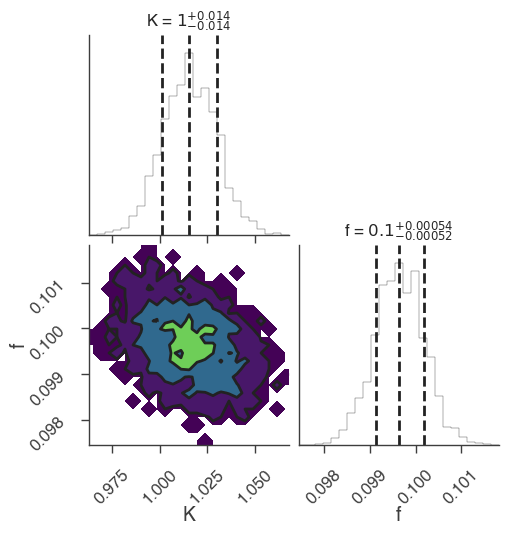

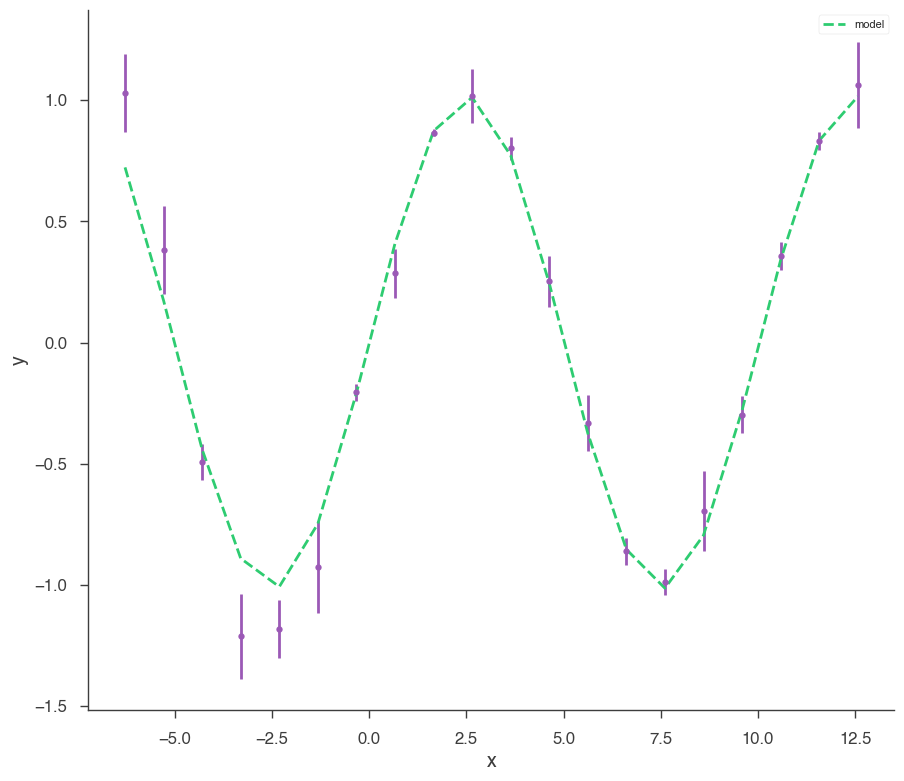

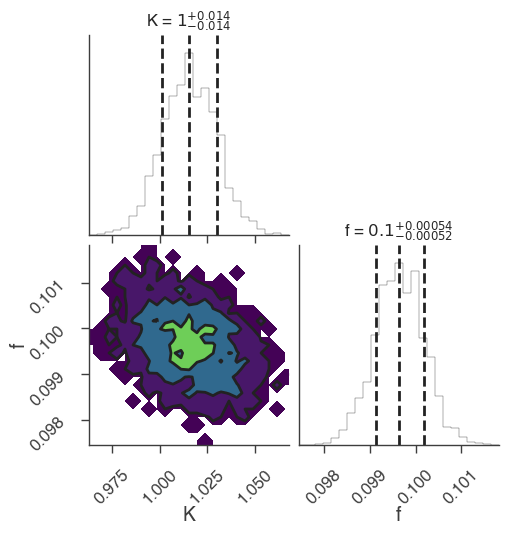

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

18:25:54 INFO      sampler set to dynesty_dynamic                                          ]8;id=691737;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=107836;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

163it [00:00, 1628.98it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 185 | eff(%): 23.796 | loglstar:   -inf < -5523.364 <    inf | logz: -5530.269 +/-  0.113 | dlogz: 5522.056 >  0.010]

381it [00:00, 1950.82it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 604 | eff(%): 34.511 | loglstar:   -inf < -2419.411 <    inf | logz: -2426.039 +/-  0.109 | dlogz: 2416.192 >  0.010]

577it [00:00, 1671.30it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 1175 | eff(%): 34.448 | loglstar:   -inf < -2064.977 <    inf | logz: -2072.757 +/-  0.121 | dlogz: 2063.852 >  0.010]

749it [00:00, 1544.90it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 1960 | eff(%): 30.447 | loglstar:   -inf < -1776.421 <    inf | logz: -1784.640 +/-  0.125 | dlogz: 1777.512 >  0.010]

907it [00:00, 1246.94it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 3006 | eff(%): 25.870 | loglstar:   -inf < -1577.259 <    inf | logz: -1584.729 +/-  0.118 | dlogz: 1575.993 >  0.010] 

1040it [00:00, 1044.92it/s, batch: 0 | bound: 0 | nc: 68 | ncall: 4226 | eff(%): 22.006 | loglstar:   -inf < -1137.603 <    inf | logz: -1146.573 +/-  0.133 | dlogz: 1141.617 >  0.010]

1153it [00:00, 930.81it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 5526 | eff(%): 19.134 | loglstar:   -inf < -825.714 <    inf | logz: -834.531 +/-  0.129 | dlogz: 826.328 >  0.010]    

1252it [00:01, 784.63it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 6838 | eff(%): 17.062 | loglstar:   -inf < -653.115 <    inf | logz: -661.976 +/-  0.127 | dlogz: 653.050 >  0.010] 

1337it [00:01, 652.54it/s, batch: 0 | bound: 0 | nc: 57 | ncall: 8362 | eff(%): 15.087 | loglstar:   -inf < -566.862 <    inf | logz: -575.809 +/-  0.127 | dlogz: 566.597 >  0.010]

1408it [00:01, 537.04it/s, batch: 0 | bound: 0 | nc: 125 | ncall: 9967 | eff(%): 13.452 | loglstar:   -inf < -494.244 <    inf | logz: -503.139 +/-  0.128 | dlogz: 493.475 >  0.010]

1468it [00:01, 490.86it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 11078 | eff(%): 12.679 | loglstar:   -inf < -439.077 <    inf | logz: -448.038 +/-  0.129 | dlogz: 438.472 >  0.010]

1521it [00:01, 429.16it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 12390 | eff(%): 11.800 | loglstar:   -inf < -399.747 <    inf | logz: -408.363 +/-  0.123 | dlogz: 398.120 >  0.010] 

1567it [00:02, 387.63it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 13600 | eff(%): 11.113 | loglstar:   -inf < -368.514 <    inf | logz: -377.004 +/-  0.124 | dlogz: 366.632 >  0.010]

1607it [00:02, 354.38it/s, batch: 0 | bound: 0 | nc: 80 | ncall: 14926 | eff(%): 10.417 | loglstar:   -inf < -350.825 <    inf | logz: -359.269 +/-  0.124 | dlogz: 348.760 >  0.010]

1643it [00:02, 352.18it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 15687 | eff(%): 10.150 | loglstar:   -inf < -323.381 <    inf | logz: -332.079 +/-  0.129 | dlogz: 321.667 >  0.010]

1679it [00:02, 297.72it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16123 | eff(%): 10.100 | loglstar:   -inf < -300.458 <    inf | logz: -309.258 +/-  0.124 | dlogz: 298.666 >  0.010] 

1884it [00:02, 668.46it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 16442 | eff(%): 11.120 | loglstar:   -inf < -208.766 <    inf | logz: -217.768 +/-  0.129 | dlogz: 206.791 >  0.010]

2037it [00:02, 867.80it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16824 | eff(%): 11.758 | loglstar:   -inf < -158.329 <    inf | logz: -167.027 +/-  0.125 | dlogz: 155.503 >  0.010]

2141it [00:02, 765.62it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 16979 | eff(%): 12.249 | loglstar:   -inf < -130.868 <    inf | logz: -140.199 +/-  0.128 | dlogz: 128.544 >  0.010]

2360it [00:03, 1092.51it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 17393 | eff(%): 13.190 | loglstar:   -inf < -85.750 <    inf | logz: -94.326 +/-  0.125 | dlogz: 82.064 >  0.010]  

2489it [00:03, 919.47it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 17649 | eff(%): 13.714 | loglstar:   -inf < -68.758 <    inf | logz: -77.731 +/-  0.126 | dlogz: 65.220 >  0.010] 

2680it [00:03, 1138.32it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 17929 | eff(%): 14.542 | loglstar:   -inf < -50.059 <    inf | logz: -58.941 +/-  0.127 | dlogz: 46.009 >  0.010]

2835it [00:03, 1234.55it/s, batch: 0 | bound: 3 | nc: 6 | ncall: 18279 | eff(%): 15.097 | loglstar:   -inf < -39.267 <    inf | logz: -48.430 +/-  0.128 | dlogz: 35.187 >  0.010]

2975it [00:03, 1029.81it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 18488 | eff(%): 15.668 | loglstar:   -inf < -31.465 <    inf | logz: -40.553 +/-  0.127 | dlogz: 27.011 >  0.010]

3177it [00:03, 1254.69it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 18812 | eff(%): 16.451 | loglstar:   -inf < -24.282 <    inf | logz: -33.496 +/-  0.127 | dlogz: 19.659 >  0.010]

3322it [00:03, 1012.42it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19137 | eff(%): 16.917 | loglstar:   -inf < -19.884 <    inf | logz: -29.007 +/-  0.128 | dlogz: 14.869 >  0.010]

3471it [00:04, 1114.01it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19331 | eff(%): 17.503 | loglstar:   -inf < -16.526 <    inf | logz: -25.668 +/-  0.128 | dlogz: 11.226 >  0.010]

3646it [00:04, 1262.05it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 19677 | eff(%): 18.070 | loglstar:   -inf < -14.094 <    inf | logz: -23.105 +/-  0.127 | dlogz:  8.307 >  0.010]

3789it [00:04, 1011.01it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 19916 | eff(%): 18.559 | loglstar:   -inf < -12.712 <    inf | logz: -21.697 +/-  0.127 | dlogz:  6.612 >  0.010]

4040it [00:04, 1335.90it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20269 | eff(%): 19.452 | loglstar:   -inf < -10.629 <    inf | logz: -19.910 +/-  0.127 | dlogz:  4.334 >  0.010]

4200it [00:04, 1063.69it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 20646 | eff(%): 19.862 | loglstar:   -inf < -9.843 <    inf | logz: -19.025 +/-  0.128 | dlogz:  3.157 >  0.010] 

4409it [00:04, 1273.55it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 20951 | eff(%): 20.554 | loglstar:   -inf < -9.069 <    inf | logz: -18.281 +/-  0.128 | dlogz:  2.083 >  0.010]

4594it [00:05, 1103.49it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 21366 | eff(%): 21.010 | loglstar:   -inf < -8.554 <    inf | logz: -17.812 +/-  0.128 | dlogz:  1.396 >  0.010]

4793it [00:05, 1282.08it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 21667 | eff(%): 21.622 | loglstar:   -inf < -8.204 <    inf | logz: -17.456 +/-  0.128 | dlogz:  0.888 >  0.010]

4984it [00:05, 1421.37it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 22035 | eff(%): 22.117 | loglstar:   -inf < -7.968 <    inf | logz: -17.224 +/-  0.128 | dlogz:  0.573 >  0.010]

5149it [00:05, 1146.83it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22272 | eff(%): 22.611 | loglstar:   -inf < -7.829 <    inf | logz: -17.085 +/-  0.128 | dlogz:  0.395 >  0.010]

5323it [00:05, 1272.17it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22556 | eff(%): 23.087 | loglstar:   -inf < -7.739 <    inf | logz: -16.981 +/-  0.128 | dlogz:  0.269 >  0.010]

5472it [00:05, 1051.47it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 22871 | eff(%): 23.414 | loglstar:   -inf < -7.691 <    inf | logz: -16.918 +/-  0.128 | dlogz:  0.195 >  0.010]

5675it [00:05, 1255.61it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23136 | eff(%): 24.010 | loglstar:   -inf < -7.632 <    inf | logz: -16.857 +/-  0.128 | dlogz:  0.126 >  0.010]

5876it [00:05, 1426.74it/s, batch: 0 | bound: 10 | nc: 8 | ncall: 23516 | eff(%): 24.467 | loglstar:   -inf < -7.600 <    inf | logz: -16.817 +/-  0.128 | dlogz:  0.083 >  0.010]

6040it [00:06, 1201.48it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 23759 | eff(%): 24.898 | loglstar:   -inf < -7.582 <    inf | logz: -16.795 +/-  0.128 | dlogz:  0.059 >  0.010]

6231it [00:06, 1358.03it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24040 | eff(%): 25.391 | loglstar:   -inf < -7.565 <    inf | logz: -16.777 +/-  0.128 | dlogz:  0.040 >  0.010]

6394it [00:06, 847.26it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 24376 | eff(%): 25.703 | loglstar:   -inf < -7.554 <    inf | logz: -16.766 +/-  0.128 | dlogz:  0.029 >  0.010] 

6525it [00:06, 925.67it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 24532 | eff(%): 26.067 | loglstar:   -inf < -7.547 <    inf | logz: -16.759 +/-  0.128 | dlogz:  0.022 >  0.010]

6678it [00:06, 1043.23it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 24794 | eff(%): 26.402 | loglstar:   -inf < -7.542 <    inf | logz: -16.753 +/-  0.128 | dlogz:  0.016 >  0.010]

6814it [00:06, 1071.05it/s, batch: 0 | bound: 12 | nc: 10 | ncall: 25102 | eff(%): 26.615 | loglstar:   -inf < -7.538 <    inf | logz: -16.750 +/-  0.128 | dlogz:  0.012 >  0.010]

6942it [00:07, 860.93it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 25264 | eff(%): 26.969 | loglstar:   -inf < -7.536 <    inf | logz: -16.747 +/-  0.128 | dlogz:  0.010 >  0.010]  


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7419it [00:08, 489.65it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 25741 | eff(%): 28.822 | loglstar: -9.224 < -7.706 < -7.971 | logz: -16.737 +/-  0.132 | stop:  1.529]           

7515it [00:08, 525.54it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 25853 | eff(%): 28.497 | loglstar: -9.224 < -8.947 < -7.971 | logz: -16.737 +/-  0.132 | stop:  1.529]

7603it [00:08, 540.39it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 25975 | eff(%): 28.698 | loglstar: -9.224 < -8.679 < -7.971 | logz: -16.737 +/-  0.132 | stop:  1.529]

7736it [00:08, 636.61it/s, batch: 1 | bound: 2 | nc: 6 | ncall: 26199 | eff(%): 28.955 | loglstar: -9.224 < -8.402 < -7.971 | logz: -16.737 +/-  0.132 | stop:  1.529]

7854it [00:09, 574.83it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 26496 | eff(%): 29.074 | loglstar: -9.224 < -8.207 < -7.971 | logz: -16.737 +/-  0.132 | stop:  1.529]

8022it [00:09, 734.96it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 26701 | eff(%): 29.472 | loglstar: -9.224 < -8.008 < -7.971 | logz: -16.737 +/-  0.132 | stop:  1.529]

8141it [00:09, 813.04it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 26840 | eff(%): 29.850 | loglstar: -9.224 < -7.895 < -7.971 | logz: -16.737 +/-  0.132 | stop:  1.529]

8525it [00:09, 1409.03it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27239 | eff(%): 31.258 | loglstar: -9.224 < -7.545 < -7.971 | logz: -16.737 +/-  0.132 | stop:  1.529]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8718it [00:10, 441.47it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27458 | eff(%): 31.185 | loglstar: -9.761 < -9.112 < -9.222 | logz: -16.746 +/-  0.109 | stop:  1.097] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9184it [00:11, 437.42it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27956 | eff(%): 32.852 | loglstar: -9.761 < -7.525 < -9.222 | logz: -16.746 +/-  0.109 | stop:  0.920]

9184it [00:11, 789.60it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27956 | eff(%): 32.852 | loglstar: -9.761 < -7.525 < -9.222 | logz: -16.746 +/-  0.109 | stop:  0.920]

18:26:06 INFO      fit restored to maximum of posterior                                         ]8;id=333729;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=533197;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=426196;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=829898;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.016 +/- 0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.05 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.540926
total,-7.540926


Values of statistical measures:

,statistical measures
AIC,19.787735
BIC,21.073317
DIC,19.046044
PDIC,1.981413
log(Z),-7.271178


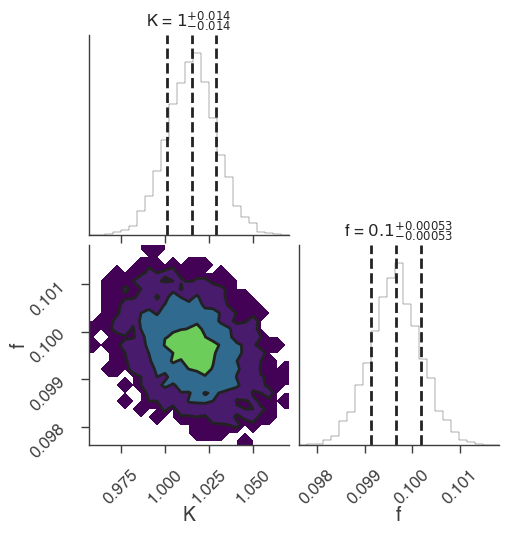

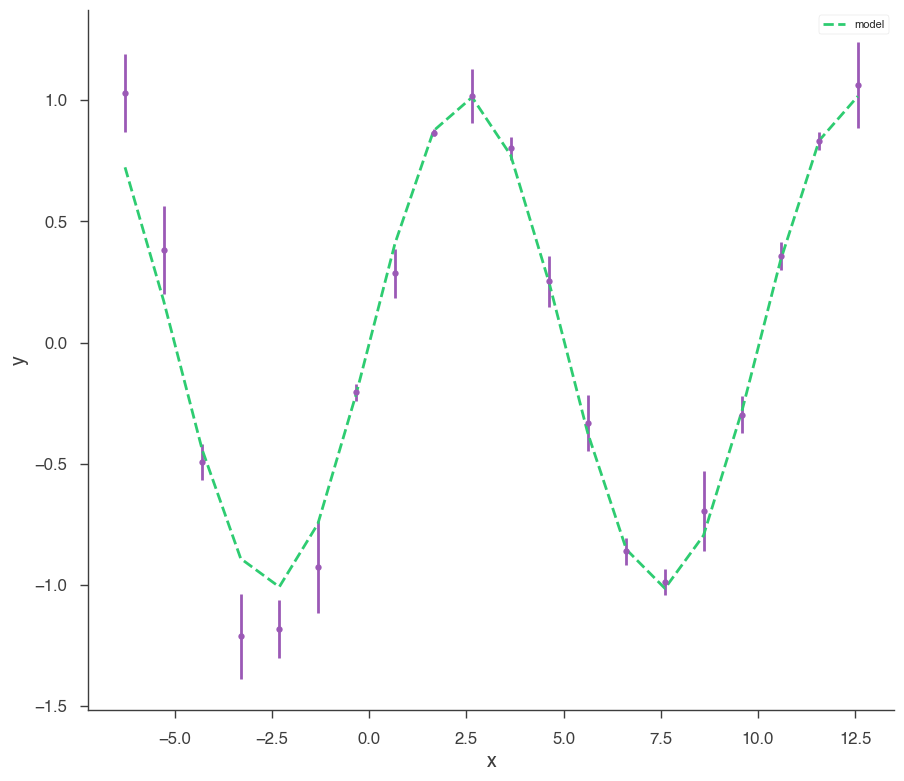

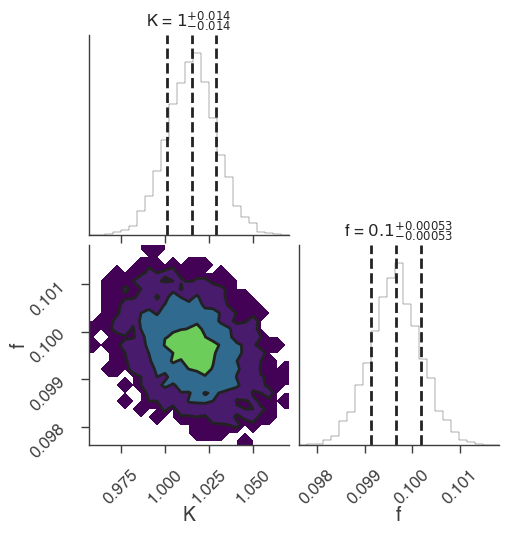

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

18:26:07 INFO      sampler set to zeus                                                     ]8;id=79904;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=614902;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:14, 43.31it/s]

Sampling progress :   2%|▏         | 11/625 [00:00<00:14, 43.43it/s]

Sampling progress :   3%|▎         | 17/625 [00:00<00:12, 47.00it/s]

Sampling progress :   4%|▎         | 22/625 [00:00<00:15, 38.38it/s]

Sampling progress :   5%|▍         | 29/625 [00:00<00:12, 45.91it/s]

Sampling progress :   5%|▌         | 34/625 [00:00<00:12, 46.52it/s]

Sampling progress :   6%|▌         | 39/625 [00:00<00:14, 39.32it/s]

Sampling progress :   8%|▊         | 47/625 [00:01<00:11, 48.44it/s]

Sampling progress :   8%|▊         | 53/625 [00:01<00:11, 48.96it/s]

Sampling progress :   9%|▉         | 59/625 [00:01<00:13, 42.79it/s]

Sampling progress :  10%|█         | 65/625 [00:01<00:13, 41.39it/s]

Sampling progress :  11%|█         | 70/625 [00:01<00:13, 39.95it/s]

Sampling progress :  12%|█▏        | 75/625 [00:01<00:13, 41.90it/s]

Sampling progress :  13%|█▎        | 80/625 [00:02<00:18, 29.20it/s]

Sampling progress :  13%|█▎        | 84/625 [00:02<00:20, 26.41it/s]

Sampling progress :  14%|█▍        | 90/625 [00:02<00:16, 31.73it/s]

Sampling progress :  15%|█▌        | 95/625 [00:02<00:15, 34.70it/s]

Sampling progress :  16%|█▌        | 101/625 [00:02<00:13, 39.21it/s]

Sampling progress :  17%|█▋        | 106/625 [00:02<00:13, 39.50it/s]

Sampling progress :  18%|█▊        | 111/625 [00:02<00:12, 40.82it/s]

Sampling progress :  19%|█▊        | 116/625 [00:02<00:12, 41.88it/s]

Sampling progress :  20%|█▉        | 123/625 [00:03<00:10, 47.59it/s]

Sampling progress :  20%|██        | 128/625 [00:03<00:10, 47.09it/s]

Sampling progress :  21%|██▏       | 134/625 [00:03<00:09, 49.42it/s]

Sampling progress :  22%|██▏       | 140/625 [00:03<00:10, 47.93it/s]

Sampling progress :  23%|██▎       | 146/625 [00:03<00:09, 49.87it/s]

Sampling progress :  24%|██▍       | 152/625 [00:03<00:09, 51.56it/s]

Sampling progress :  25%|██▌       | 158/625 [00:03<00:09, 50.18it/s]

Sampling progress :  26%|██▌       | 164/625 [00:03<00:08, 51.37it/s]

Sampling progress :  27%|██▋       | 170/625 [00:03<00:08, 50.95it/s]

Sampling progress :  28%|██▊       | 176/625 [00:04<00:08, 51.23it/s]

Sampling progress :  29%|██▉       | 182/625 [00:04<00:08, 50.02it/s]

Sampling progress :  30%|███       | 188/625 [00:04<00:08, 50.76it/s]

Sampling progress :  31%|███       | 194/625 [00:04<00:08, 48.89it/s]

Sampling progress :  32%|███▏      | 201/625 [00:04<00:08, 51.91it/s]

Sampling progress :  33%|███▎      | 207/625 [00:04<00:08, 51.48it/s]

Sampling progress :  34%|███▍      | 213/625 [00:04<00:08, 49.82it/s]

Sampling progress :  35%|███▌      | 219/625 [00:04<00:08, 49.95it/s]

Sampling progress :  36%|███▌      | 225/625 [00:05<00:07, 51.44it/s]

Sampling progress :  37%|███▋      | 231/625 [00:05<00:07, 52.68it/s]

Sampling progress :  38%|███▊      | 237/625 [00:05<00:07, 50.45it/s]

Sampling progress :  39%|███▉      | 243/625 [00:05<00:07, 51.92it/s]

Sampling progress :  40%|███▉      | 249/625 [00:05<00:07, 50.05it/s]

Sampling progress :  41%|████      | 255/625 [00:05<00:08, 45.78it/s]

Sampling progress :  42%|████▏     | 261/625 [00:05<00:07, 48.15it/s]

Sampling progress :  43%|████▎     | 266/625 [00:05<00:08, 44.35it/s]

Sampling progress :  43%|████▎     | 271/625 [00:06<00:07, 44.58it/s]

Sampling progress :  44%|████▍     | 276/625 [00:06<00:08, 40.75it/s]

Sampling progress :  45%|████▍     | 281/625 [00:06<00:08, 41.47it/s]

Sampling progress :  46%|████▌     | 286/625 [00:06<00:08, 41.71it/s]

Sampling progress :  47%|████▋     | 292/625 [00:06<00:07, 46.19it/s]

Sampling progress :  48%|████▊     | 297/625 [00:06<00:07, 43.44it/s]

Sampling progress :  48%|████▊     | 302/625 [00:06<00:10, 29.63it/s]

Sampling progress :  49%|████▉     | 309/625 [00:07<00:08, 37.12it/s]

Sampling progress :  50%|█████     | 314/625 [00:07<00:12, 24.65it/s]

Sampling progress :  51%|█████     | 318/625 [00:07<00:11, 25.76it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:07<00:09, 31.24it/s]

Sampling progress :  53%|█████▎    | 329/625 [00:07<00:08, 33.50it/s]

Sampling progress :  54%|█████▎    | 335/625 [00:07<00:07, 37.50it/s]

Sampling progress :  55%|█████▍    | 341/625 [00:08<00:06, 41.21it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:08<00:06, 43.18it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:08<00:06, 44.10it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:08<00:05, 47.21it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:08<00:05, 46.58it/s]

Sampling progress :  59%|█████▉    | 369/625 [00:08<00:05, 49.16it/s]

Sampling progress :  60%|██████    | 375/625 [00:09<00:08, 28.91it/s]

Sampling progress :  61%|██████    | 379/625 [00:09<00:08, 30.03it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:09<00:07, 31.43it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:09<00:06, 34.68it/s]

Sampling progress :  63%|██████▎   | 393/625 [00:09<00:06, 37.48it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:09<00:05, 40.34it/s]

Sampling progress :  64%|██████▍   | 403/625 [00:09<00:05, 42.81it/s]

Sampling progress :  65%|██████▌   | 408/625 [00:09<00:05, 43.24it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:09<00:04, 47.43it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:09<00:04, 46.60it/s]

Sampling progress :  68%|██████▊   | 424/625 [00:10<00:04, 47.49it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:10<00:03, 52.13it/s]

Sampling progress :  70%|██████▉   | 437/625 [00:10<00:03, 50.88it/s]

Sampling progress :  71%|███████   | 443/625 [00:10<00:03, 51.70it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:10<00:03, 53.33it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:10<00:03, 52.09it/s]

Sampling progress :  74%|███████▍  | 461/625 [00:10<00:03, 51.11it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:10<00:03, 51.03it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:11<00:02, 50.92it/s]

Sampling progress :  77%|███████▋  | 479/625 [00:11<00:02, 50.59it/s]

Sampling progress :  78%|███████▊  | 485/625 [00:11<00:02, 50.29it/s]

Sampling progress :  79%|███████▊  | 491/625 [00:11<00:02, 51.04it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:11<00:02, 51.21it/s]

Sampling progress :  80%|████████  | 503/625 [00:11<00:02, 52.06it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:11<00:02, 52.35it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:11<00:02, 50.08it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:11<00:02, 46.85it/s]

Sampling progress :  84%|████████▍ | 526/625 [00:12<00:02, 43.59it/s]

Sampling progress :  85%|████████▍ | 531/625 [00:12<00:02, 45.00it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:12<00:01, 45.40it/s]

Sampling progress :  87%|████████▋ | 541/625 [00:12<00:01, 45.53it/s]

Sampling progress :  88%|████████▊ | 547/625 [00:12<00:01, 48.52it/s]

Sampling progress :  88%|████████▊ | 553/625 [00:12<00:01, 50.04it/s]

Sampling progress :  89%|████████▉ | 559/625 [00:12<00:01, 52.37it/s]

Sampling progress :  90%|█████████ | 565/625 [00:12<00:01, 52.16it/s]

Sampling progress :  92%|█████████▏| 572/625 [00:12<00:00, 55.49it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:13<00:00, 56.41it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:13<00:00, 59.40it/s]

Sampling progress :  95%|█████████▍| 591/625 [00:13<00:00, 41.44it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:13<00:00, 44.50it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:13<00:00, 41.91it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:13<00:00, 41.46it/s]

Sampling progress :  99%|█████████▊| 616/625 [00:14<00:00, 44.52it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:14<00:00, 49.55it/s]

Sampling progress : 100%|██████████| 625/625 [00:14<00:00, 44.13it/s]

18:26:22 INFO      fit restored to maximum of posterior                                         ]8;id=418132;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=182517;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=998526;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=320919;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 27


Scale Factor: 1.090164


Mean Integrated Autocorrelation Time: 3.21


Effective Sample Size: 3896.6


Number of Log Probability Evaluations: 65363


Effective Samples per Log Probability Evaluation: 0.059615


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.016 +/- 0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.05 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.541031
total,-7.541031


Values of statistical measures:

,statistical measures
AIC,19.787944
BIC,21.073526
DIC,19.121326
PDIC,2.017930


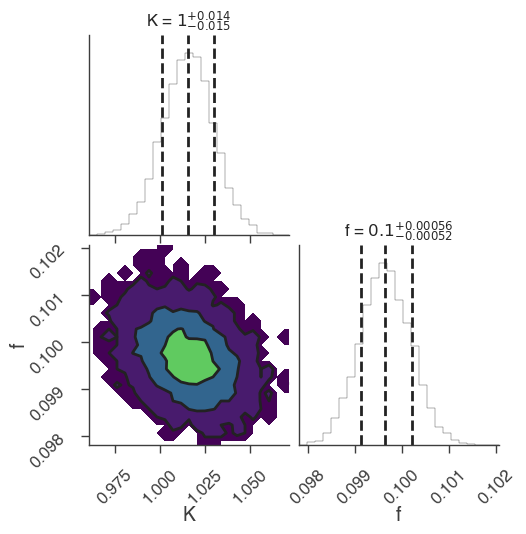

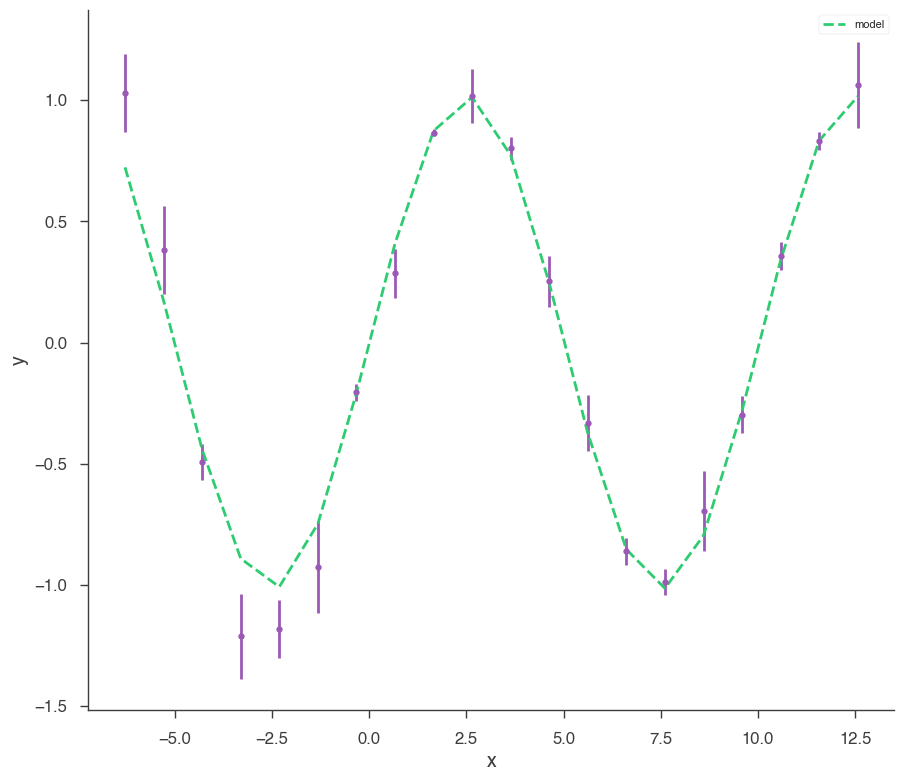

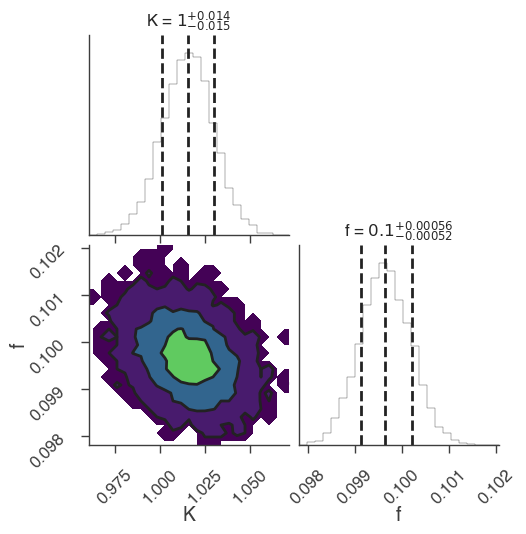

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

18:26:24 INFO      sampler set to ultranest                                                ]8;id=62651;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=448503;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8  


[ultranest] Likelihood function evaluations: 6580


[ultranest]   logZ = -17.05 +- 0.1237


[ultranest] Effective samples strategy satisfied (ESS = 983.9, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


18:26:35 INFO      fit restored to maximum of posterior                                         ]8;id=364676;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=139166;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=901679;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=482916;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.016 +/- 0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.05 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.545849
total,-7.545849


Values of statistical measures:

,statistical measures
AIC,19.797580
BIC,21.083162
DIC,19.134711
PDIC,2.025942
log(Z),-7.419405


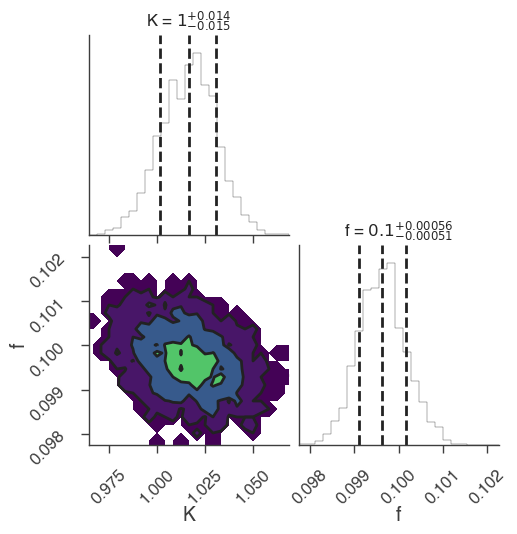

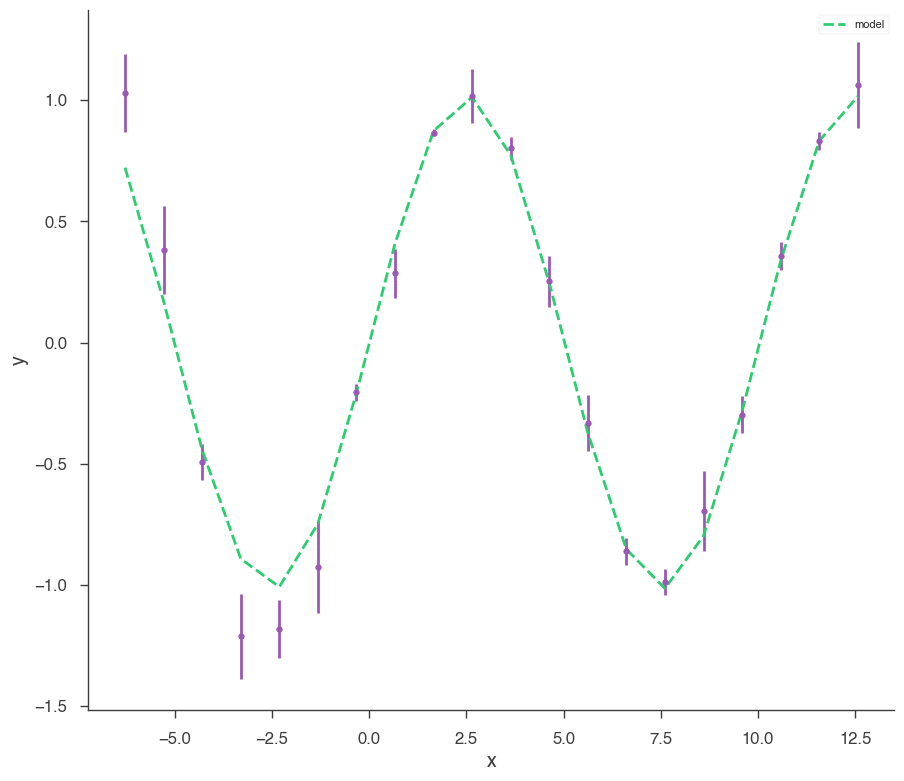

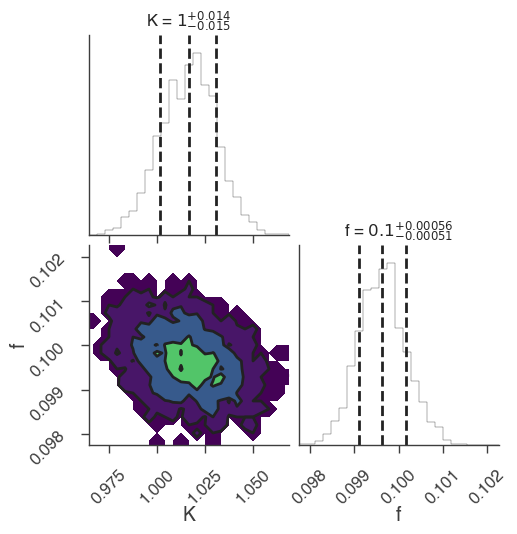

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()